<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/ProjectTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
titanic_data = pd.read_csv('/content/train_titanic.csv', header=None)

In [126]:
titanic_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [127]:
titanic_data.shape

(892, 12)

In [128]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       892 non-null    object
 1   1       892 non-null    object
 2   2       892 non-null    object
 3   3       892 non-null    object
 4   4       892 non-null    object
 5   5       715 non-null    object
 6   6       892 non-null    object
 7   7       892 non-null    object
 8   8       892 non-null    object
 9   9       892 non-null    object
 10  10      205 non-null    object
 11  11      890 non-null    object
dtypes: object(12)
memory usage: 83.8+ KB


In [129]:
titanic_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,177
6,0
7,0
8,0
9,0


In [130]:
titanic_data.drop(columns=10, axis=1, inplace=True)

In [131]:
# Convert column 5 (Age) to numeric, force errors to NaN
titanic_data[5] = pd.to_numeric(titanic_data[5], errors='coerce')

# Now fill missing values with the mean
titanic_data[5].fillna(titanic_data[5].mean(), inplace=True)

<ipython-input-131-510710480>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data[5].fillna(titanic_data[5].mean(), inplace=True)


In [132]:
# Get the mode (most frequent value) of the object column
mode_embarked = titanic_data[11].mode()[0]

# Fill missing values with the mode
titanic_data[11].fillna(mode_embarked, inplace=True)

# Confirm there are no more nulls
print(titanic_data[11].isnull().sum())  # Should print 0


0


<ipython-input-132-3643142893>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data[11].fillna(mode_embarked, inplace=True)


In [133]:
titanic_data.isnull().sum()
titanic_data = titanic_data.iloc[1:]

In [134]:
# List of column indices to convert to numeric
numeric_columns = [0, 1, 2, 5, 6, 7, 9]  # 5 is Age, already cleaned earlier

# Convert each to numeric (in case any are stored as strings)
for col in numeric_columns:
    titanic_data[col] = pd.to_numeric(titanic_data[col], errors='coerce')

# Optional: Check the data types after conversion
print(titanic_data.dtypes)

0       int64
1       int64
2       int64
3      object
4      object
5     float64
6       int64
7       int64
8      object
9     float64
11     object
dtype: object


<ipython-input-134-1581124234>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data[col] = pd.to_numeric(titanic_data[col], errors='coerce')


In [135]:
#data analysis
titanic_data.describe()

,0,1,2,5,6,7,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
#finding the number of people survived and died
titanic_data[1].value_counts()

,count
1,
0,549
1,342


In [137]:
sns.set()

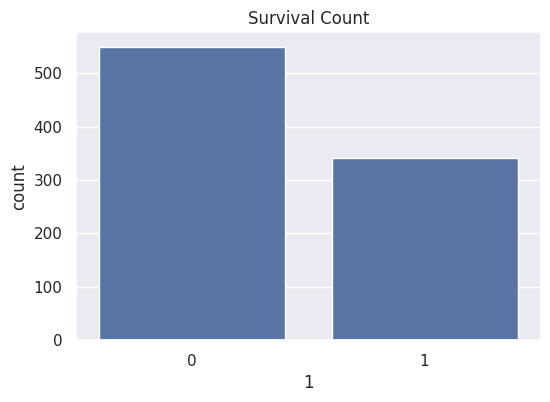

In [138]:
# survived
plt.figure(figsize=(6, 4))
sns.countplot(x=titanic_data[1])
plt.title("Survival Count")
plt.show()

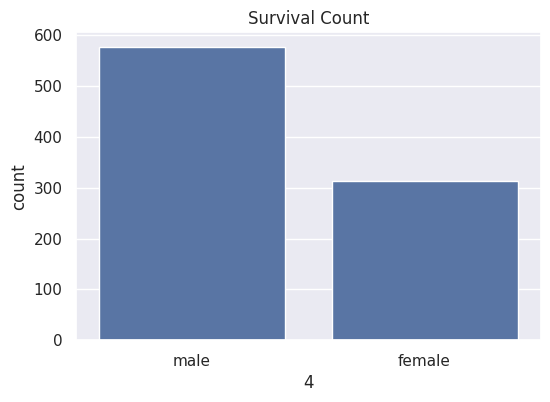

In [139]:
# gender
plt.figure(figsize=(6, 4))
sns.countplot(x=titanic_data[4])
plt.title("Survival Count")
plt.show()

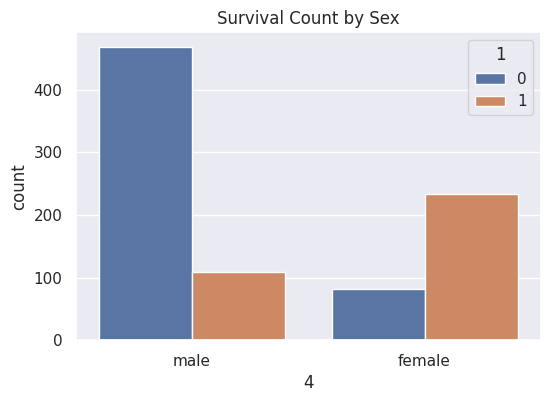

In [140]:
plt.figure(figsize=(6, 4))
sns.countplot(x=titanic_data[4], hue=titanic_data[1])
plt.title("Survival Count by Sex")
plt.show()

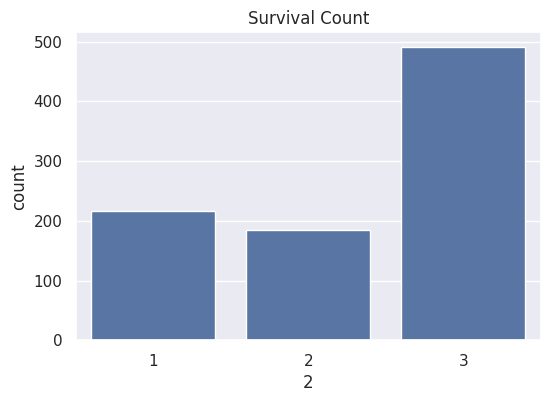

In [141]:
# Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x=titanic_data[2])
plt.title("Survival Count")
plt.show()

In [142]:
#encoding the categorical colums
titanic_data[4] = titanic_data[4].replace({'male': 0, 'female': 1})
titanic_data[11] = titanic_data[11].replace({'S': 0, 'C': 1, 'Q': 2})
titanic_data.head()

<ipython-input-142-3255547767>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data[4] = titanic_data[4].replace({'male': 0, 'female': 1})
<ipython-input-142-3255547767>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data[11] = titanic_data[11].replace({'S': 0, 'C': 1, 'Q': 2})


,0,1,2,3,4,5,6,7,8,9,11
1,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
3,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
5,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [143]:
# Separate features (X) and label (Y)
x = titanic_data.drop(columns=[0, 1, 3, 8])  # Dropping PassengerId, Survived, Name, Ticket
y = titanic_data[1]  # Survived column as label

In [144]:
print(x)
print(y)

     2   4          5   6   7        9   11
1     3   0  22.000000   1   0   7.2500   0
2     1   1  38.000000   1   0  71.2833   1
3     3   1  26.000000   0   0   7.9250   0
4     1   1  35.000000   1   0  53.1000   0
5     3   0  35.000000   0   0   8.0500   0
..   ..  ..        ...  ..  ..      ...  ..
887   2   0  27.000000   0   0  13.0000   0
888   1   1  19.000000   0   0  30.0000   0
889   3   1  29.699118   1   2  23.4500   0
890   1   0  26.000000   0   0  30.0000   1
891   3   0  32.000000   0   0   7.7500   2

[891 rows x 7 columns]
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: 1, Length: 891, dtype: int64


In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (801, 7) (90, 7)


In [146]:
#model traing using logistic regression
model = LogisticRegression()
#training the model with training the data
model.fit(x_train,y_train)

LogisticRegression()

In [147]:
#train model evaluation
x_train_prediction = model.predict(x_train)
Training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('train accuracy score',Training_data_accuracy)

train accuracy score 0.8052434456928839


In [148]:
# test model evaluation
x_test_prediction = model.predict(x_test)
Test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print('test accuracy score',Test_data_accuracy)

test accuracy score 0.7777777777777778
